# Setup

In [ ]:
!pip install kneed

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
import pandas as pd
from kneed import KneeLocator

from google.colab import drive 
drive.mount('/content/gdrive')

df=pd.read_csv('/content/gdrive/MyDrive/clusterableData.csv')

Mounted at /content/gdrive


# Matching ECL Settings for KMeans

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=10,
    n_init=10,
    max_iter=115,
    random_state=42
)

labels = kmeans.fit_predict(df)
labels

array([8, 1, 7, ..., 1, 1, 8], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[7.83042947e+03, 2.84448859e+05, 3.97492163e+00],
       [1.04245776e+04, 1.60836403e+05, 2.92413793e+00],
       [5.23188636e+03, 7.31814636e+05, 4.43181818e+00],
       [5.81038554e+03, 4.96950133e+05, 4.28915663e+00],
       [4.87983333e+03, 1.17925867e+06, 4.75000000e+00],
       [1.41142904e+04, 5.80879786e+04, 2.23391813e+00],
       [1.56016250e+04, 2.03961062e+06, 3.75000000e+00],
       [8.47751786e+03, 2.17148641e+05, 3.34126984e+00],
       [1.27363795e+04, 1.08572402e+05, 2.58425197e+00],
       [7.49334503e+03, 3.74705409e+05, 4.30409357e+00]])

In [ ]:
kmeans.n_iter_

101

# Visualizing the Data 

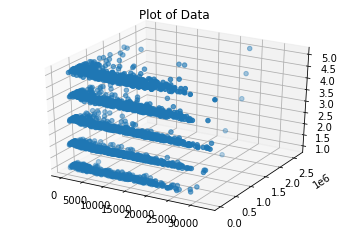

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title("Plot of Data")

ax.scatter3D(df['sizerank'], df['octprice'], df['bedrooms'], cmap='hsv');

Another angle 



---


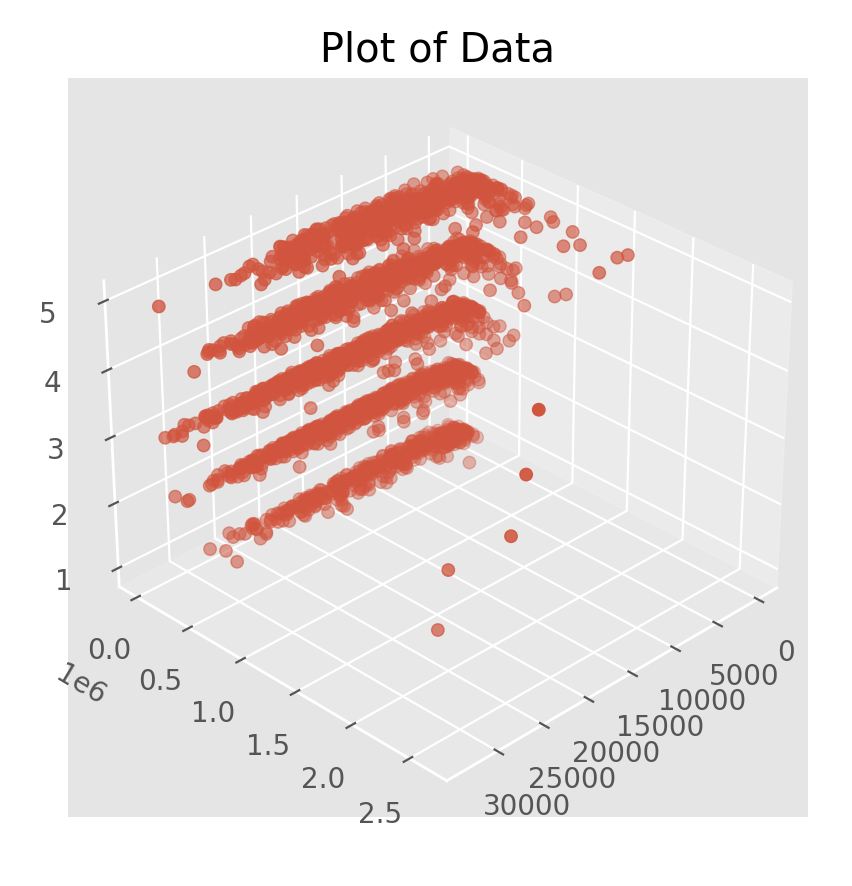


# Finding the best Number of Clusters

In [ ]:
kmeans_setup = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
iters =[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_setup)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    iters.append(kmeans.n_iter_)

sse

[85357822229873.03,
 44783677773462.99,
 23162635360918.266,
 13992875422889.45,
 8921884549273.36,
 6822956242371.572,
 5757196854021.914,
 5127412328339.43,
 3343499619918.221,
 2887298721978.0854]

In [ ]:
iters

[2, 37, 33, 28, 31, 44, 73, 48, 93, 117]

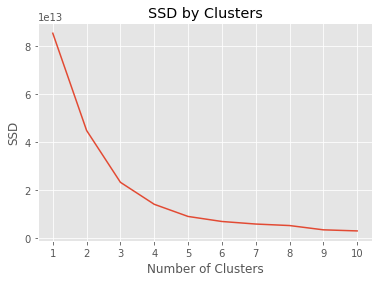

In [ ]:
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.title("SSD by Clusters")
plt.show()

In [ ]:
kl1 = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl1.elbow


4

Trying to find the elbow without 1 and 2 as possible number of clusters as it is unlikely and unhelfpul to our task to have that few clusters

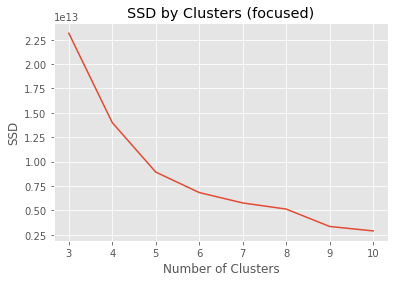

In [ ]:
plt.plot(range(3, 11), sse[2:])
plt.xticks(range(3, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.title("SSD by Clusters (focused)")
plt.show()

In [ ]:
kl2 = KneeLocator(
    range(3, 11), sse[2:], curve="convex", direction="decreasing"
)

kl2.elbow

5

# Clustering

## 4 Clusters

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

labels = kmeans.fit_predict(df)

cluster1 = pd.DataFrame()
cluster2 = pd.DataFrame()
cluster3 = pd.DataFrame()
cluster4 = pd.DataFrame()


for row in range(0, len(labels)):
    if labels[row] == 0:
      cluster1 = cluster1.append(df[row:row+1])
    elif labels[row] == 1:
      cluster2 = cluster2.append(df[row:row+1])
    elif labels[row] == 2:
      cluster3 = cluster3.append(df[row:row+1])
    elif labels[row] == 3:
      cluster4 = cluster4.append(df[row:row+1])

([], <a list of 0 Text major ticklabel objects>)

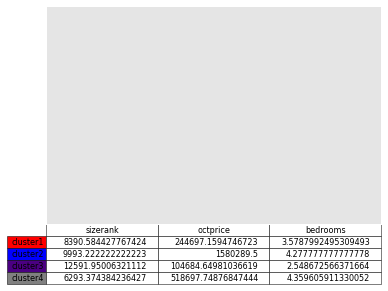

In [ ]:
plt.table(cellText=kmeans.cluster_centers_, 
          colLabels=['sizerank', 'octprice', 'bedrooms'], 
          rowLabels= ['cluster1', 'cluster2', 'cluster3', 'cluster4'],
          rowColours=['red','blue','indigo', 'gray']
          )
plt.yticks([])
plt.xticks([])

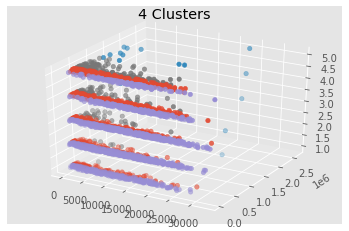

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title("4 Clusters")

ax.scatter3D(cluster1['sizerank'], cluster1['octprice'], cluster1['bedrooms'], cmap='hsv');
ax.scatter3D(cluster2['sizerank'], cluster2['octprice'], cluster2['bedrooms'], cmap='hsv');
ax.scatter3D(cluster3['sizerank'], cluster3['octprice'], cluster3['bedrooms'], cmap='hsv');
ax.scatter3D(cluster4['sizerank'], cluster4['octprice'], cluster4['bedrooms'], cmap='hsv');

Another angle


---

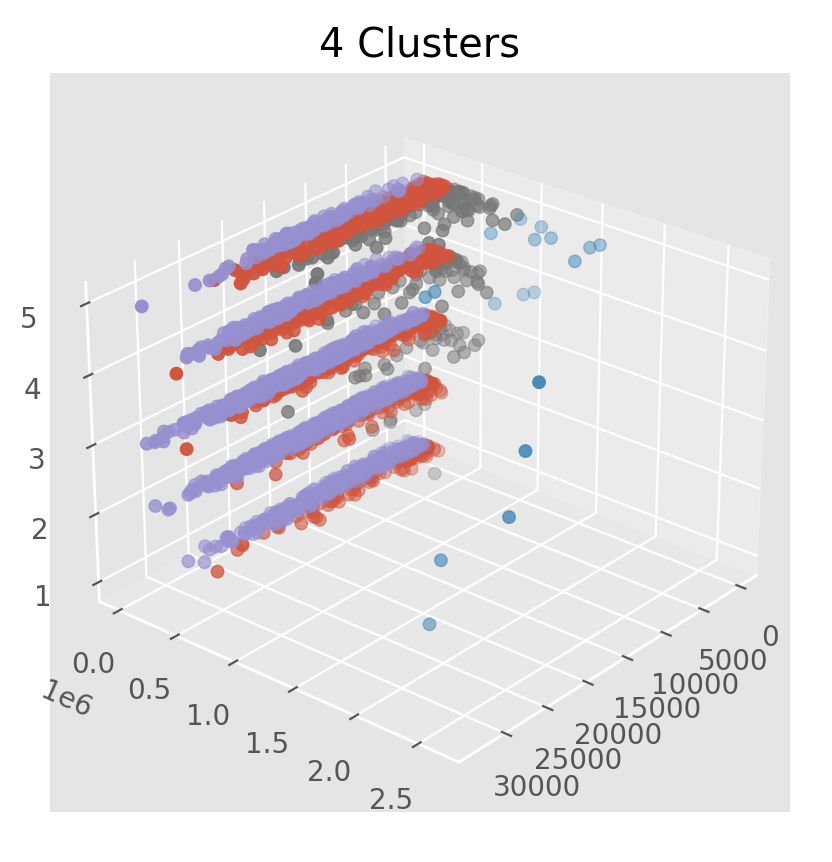


## 5 Clusters

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

labels = kmeans.fit_predict(df)

cluster1 = pd.DataFrame()
cluster2 = pd.DataFrame()
cluster3 = pd.DataFrame()
cluster4 = pd.DataFrame()
cluster5 = pd.DataFrame()


for row in range(0, len(labels)):
    if labels[row] == 0:
      cluster1 = cluster1.append(df[row:row+1])
    elif labels[row] == 1:
      cluster2 = cluster2.append(df[row:row+1])
    elif labels[row] == 2:
      cluster3 = cluster3.append(df[row:row+1])
    elif labels[row] == 3:
      cluster4 = cluster4.append(df[row:row+1])
    elif labels[row] == 4:
      cluster5 = cluster5.append(df[row:row+1])

([], <a list of 0 Text major ticklabel objects>)

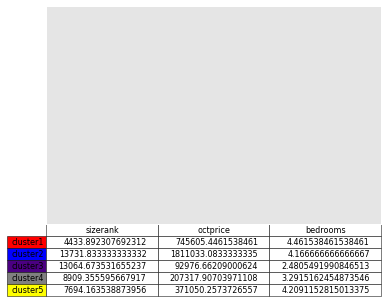

In [ ]:
plt.table(cellText=kmeans.cluster_centers_, 
          colLabels=['sizerank', 'octprice', 'bedrooms'], 
          rowLabels= ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5'],
          rowColours=['red','blue','indigo', 'gray', 'yellow']
          )
plt.yticks([])
plt.xticks([])

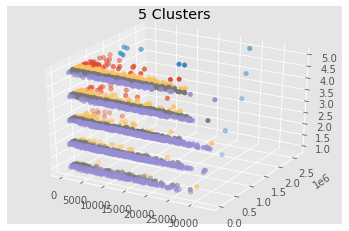

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title("5 Clusters")

ax.scatter3D(cluster1['sizerank'], cluster1['octprice'], cluster1['bedrooms'], cmap='hsv');
ax.scatter3D(cluster2['sizerank'], cluster2['octprice'], cluster2['bedrooms'], cmap='hsv');
ax.scatter3D(cluster3['sizerank'], cluster3['octprice'], cluster3['bedrooms'], cmap='hsv');
ax.scatter3D(cluster4['sizerank'], cluster4['octprice'], cluster4['bedrooms'], cmap='hsv');
ax.scatter3D(cluster5['sizerank'], cluster5['octprice'], cluster5['bedrooms'], cmap='hsv');



Another angle

---
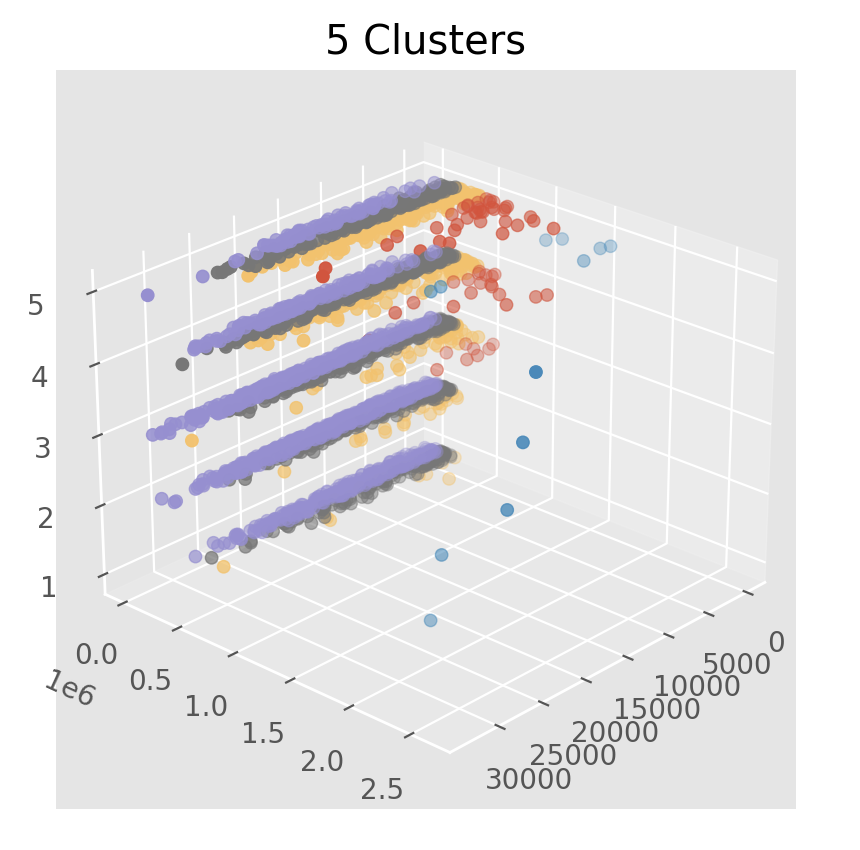